In [2]:
# Melakukan import library
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimage 
import numpy as np
import os 
from prettytable import PrettyTable

Text(0.5, 1.0, 'Citra1')

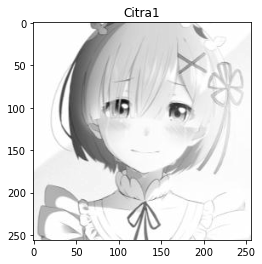

In [3]:
# Melakukan import Citra1
mcitra = cv2.imread("waifu.jpg",0)
plt.imshow(mcitra,"gray")
plt.title("Citra1")
# print(mcitra.shape, "\n")
# print(mcitra)

# HISTOGRAM

In [5]:
# Mencari nk
intens = [i for i in range(256)]
matriks = np.zeros(len(intens)) 
for i in (mcitra):
    for j in (i):
        matriks[j]+=1
total = int(sum(matriks))

<BarContainer object of 256 artists>

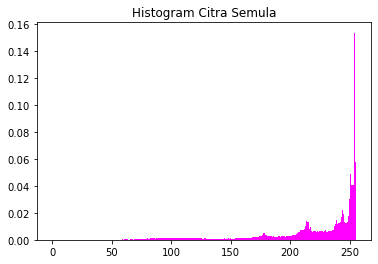

In [27]:
# Menampilkan histogram semula
plt.title("Histogram Citra Semula")
plt.bar(intens, matriks, width=1, color="magenta")

# EKUALISASI HISTOGRAM

In [6]:
# Mencari rk
rk = np.zeros(len(intens))
for i in range(len(rk)):
    rk[i] = i/len(rk)

# Mencari n
n = 0
for i in matriks:
    n+=i

# Mencari Pr(rk)=nk/n
p = np.zeros(len(intens))
for i in range(len(p)):
    p[i]= matriks[i]/n

In [7]:
# Menampilkan tabel histogram semula
tabelHistogram = PrettyTable(["r index","rk", "nk", "Pr(rk)=nk/n"])
i = 0
for j in matriks:
    tabelHistogram.add_row([i, round(rk[i],4), round(matriks[i]), round(p[i],5)])
    i+=1

print("Tabel Histogram Semula")
print(tabelHistogram)

Tabel Histogram Semula
+---------+--------+---------+-------------+
| r index |   rk   |    nk   | Pr(rk)=nk/n |
+---------+--------+---------+-------------+
|    0    |  0.0   |   1.0   |    2e-05    |
|    1    | 0.0039 |   0.0   |     0.0     |
|    2    | 0.0078 |   0.0   |     0.0     |
|    3    | 0.0117 |   1.0   |    2e-05    |
|    4    | 0.0156 |   1.0   |    2e-05    |
|    5    | 0.0195 |   0.0   |     0.0     |
|    6    | 0.0234 |   0.0   |     0.0     |
|    7    | 0.0273 |   0.0   |     0.0     |
|    8    | 0.0312 |   0.0   |     0.0     |
|    9    | 0.0352 |   0.0   |     0.0     |
|    10   | 0.0391 |   0.0   |     0.0     |
|    11   | 0.043  |   1.0   |    2e-05    |
|    12   | 0.0469 |   2.0   |    3e-05    |
|    13   | 0.0508 |   1.0   |    2e-05    |
|    14   | 0.0547 |   1.0   |    2e-05    |
|    15   | 0.0586 |   0.0   |     0.0     |
|    16   | 0.0625 |   1.0   |    2e-05    |
|    17   | 0.0664 |   0.0   |     0.0     |
|    18   | 0.0703 |   1.0   |  

In [8]:
# Membagi citra dengan total frekuensi derajat keabuan untuk menjadikan rentangnya 0-1
matriks = matriks/sum(matriks)

In [9]:
# Mencari sk (frekuensi kumulatif)
bantu= 0
sk = np.zeros(len(intens))
for i in range(len(sk)):
    bantu+=matriks[i]
    sk[i]=bantu
# print(sk)
# plt.bar(intens, sk, color="magenta") # Pengecekkan histogram sk yang harus selalu naik

In [10]:
# Memetakan nilai pada matriks hasil ( hasilEku = Normal(sk) )
hasilEku = np.zeros(len(intens))
for i in range(len(hasilEku)):
    hasilEku[int (round(sk[i]*255))]+= matriks[i]
# print(hasilEku)

<BarContainer object of 256 artists>

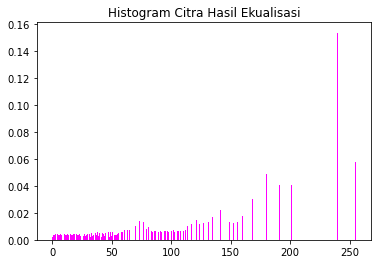

In [26]:
# Menampilkan histogram hasil ekualisasi
plt.title("Histogram Citra Hasil Ekualisasi")
plt.bar(intens, hasilEku, color="magenta")

In [12]:
# Pemulihan matriks
mat = np.zeros(len(intens)) 
for i in (mcitra):
    for j in (i):
        mat[j]+=1

# Menampilkan tabel histogram ekualisasi
tabelHistogram = PrettyTable(["r index","rk", "nk", "Pr(rk)=nk/n", "sk", " Normal(sk) "])
i = 0
for j in matriks:
    tabelHistogram.add_row([i, round(rk[i],4), round(mat[i]), round(p[i],5), round(sk[i],5), round(hasilEku[i],5)])
    i+=1

print("Tabel Histogram Hasil Ekualisasi")
print(tabelHistogram)

Tabel Histogram Hasil Ekualisasi
+---------+--------+---------+-------------+---------+--------------+
| r index |   rk   |    nk   | Pr(rk)=nk/n |    sk   |  Normal(sk)  |
+---------+--------+---------+-------------+---------+--------------+
|    0    |  0.0   |   1.0   |    2e-05    |  2e-05  |   0.00195    |
|    1    | 0.0039 |   0.0   |     0.0     |  2e-05  |   0.00386    |
|    2    | 0.0078 |   0.0   |     0.0     |  2e-05  |    0.0033    |
|    3    | 0.0117 |   1.0   |    2e-05    |  3e-05  |   0.00407    |
|    4    | 0.0156 |   1.0   |    2e-05    |  5e-05  |   0.00444    |
|    5    | 0.0195 |   0.0   |     0.0     |  5e-05  |   0.00322    |
|    6    | 0.0234 |   0.0   |     0.0     |  5e-05  |   0.00371    |
|    7    | 0.0273 |   0.0   |     0.0     |  5e-05  |   0.00436    |
|    8    | 0.0312 |   0.0   |     0.0     |  5e-05  |   0.00372    |
|    9    | 0.0352 |   0.0   |     0.0     |  5e-05  |   0.00417    |
|    10   | 0.0391 |   0.0   |     0.0     |  5e-05  |   

Text(0.5, 1.0, 'Citra Hasil Ekualisasi')

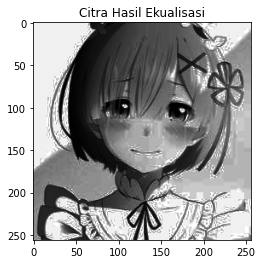

In [13]:
# Mengkonversi indeks baru yang didapat ke citra hasil ekualisasi
citraEku = np.zeros([len(mcitra),len(mcitra[0])])
for i in range(len(intens)):
    citraEku[mcitra==i]=int(round(sk[i]*255))
plt.imshow(citraEku,"gray")
plt.title("Citra Hasil Ekualisasi")

# SPESIFIKASI HISTOGRAM

Text(0.5, 1.0, 'Citra2')

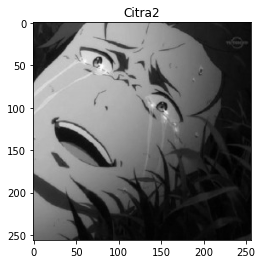

In [14]:
# Melakukan import Citra2
mspek = cv2.imread("spek.jpeg",0)
plt.imshow(mspek,"gray")
plt.title("Citra2")
# print(mspek.shape, "\n")
# print(mspek)

In [15]:
# Mencari zk 
matrix = np.zeros(len(intens)) 
for i in (mspek):
    for j in (i):
        matrix[j]+=1

<BarContainer object of 256 artists>

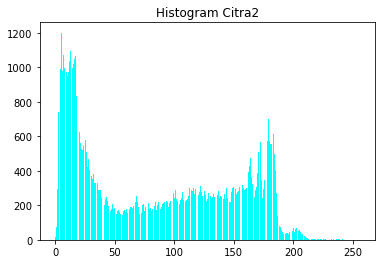

In [25]:
# Menampilkan histogram target (Citra2)
plt.title("Histogram Citra2")
plt.bar(intens, matrix, color="cyan")

<BarContainer object of 256 artists>

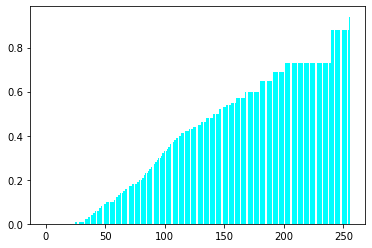

In [17]:
# Mencari sk_eku (sk dari data hasilEku)
ron = np.zeros(len(intens))
for i in range(len(ron)):
    ron[i] = round(hasilEku[i],2)

sk_eku = np.zeros(len(intens))
bantu=0
for i in range(len(intens)):
    bantu +=ron[i] 
    sk_eku[i] = bantu
#print(sk_eku)
plt.bar(intens, sk_eku, color="cyan")

<BarContainer object of 256 artists>

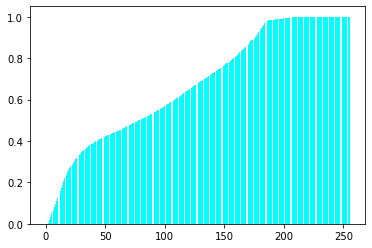

In [18]:
# Mencari fungsi transformasi G(zk)
g_zk = np.zeros(len(intens))
bantu=0
for i in range (len(g_zk)):
    bantu += matrix[i] 
    g_zk[i] = bantu
g_zk = g_zk/sum(matrix)
#print(g_zk)
plt.bar(intens, g_zk, color="cyan")

<BarContainer object of 256 artists>

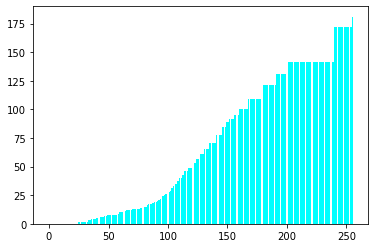

In [19]:
# Membuat index baru untuk matriks hasil melalui pencarian kedekatan dengan G(zk)
indeks = [] # Menyimpan hasil perbandingan
for i in range (len(intens)):
    ind = 0
    if(sk_eku[i]!=0): # Minimal harus punya frekuensi, tidak boleh nol
        ban = 1 # Untuk mencari selisih terkecil, di set nilai angka yang terbesar dalam rentang 0-1
        for j in range (len(intens)):
            if (g_zk[j]!=0): 
                if (abs(g_zk[j]-sk_eku[i])<ban):
                    ban=abs(g_zk[j]-sk_eku[i]) # menghitung selisih dan menjadikannya mutlak agar tidak ada nilai minus
                    ind=j
    indeks.append(ind)
plt.bar(intens, indeks, color="cyan")

In [20]:
# Mengisi matriks berindeks baru dengan matriks hasil ekualisasi
hasilSpek=np.zeros(len(intens))
for i in range (len(hasilSpek)):
    hasilSpek[indeks[i]]+=hasilEku[i]

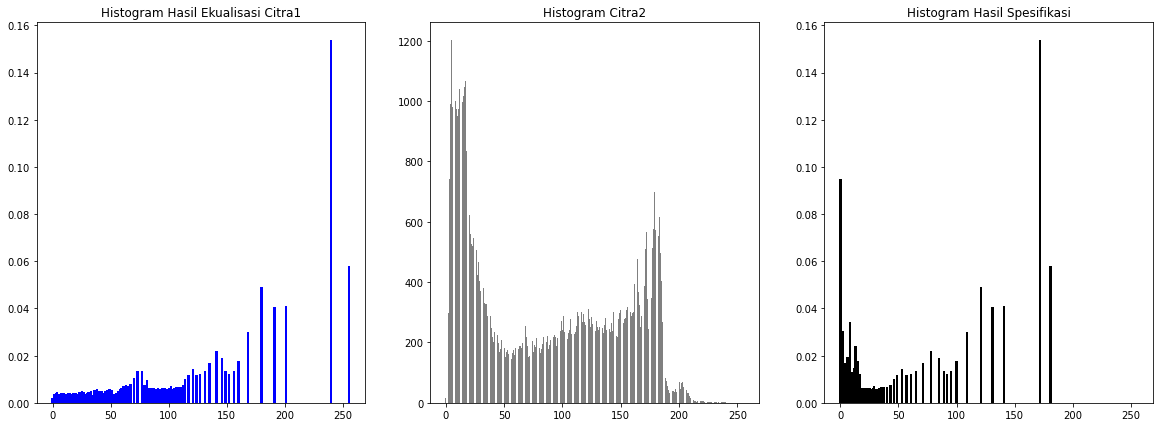

In [21]:
# Menampilkan histogram perbandingan antara hasil ekualisasi Citra1, frekuansi kumulatif Citra2, dan hasil spesifikasi histogram
plt.figure(figsize=(20,7)) 
plt.subplot(1,3,1) 
plt.bar(intens, hasilEku, width=2, color="blue")
plt.title("Histogram Hasil Ekualisasi Citra1")
plt.subplot(1,3,2) 
plt.bar(intens, matrix, color="gray")
plt.title("Histogram Citra2")
plt.subplot(1,3,3) 
plt.bar(intens, hasilSpek, width=2, color="black")
plt.title("Histogram Hasil Spesifikasi")
plt.show()

Text(0.5, 1.0, 'Citra Hasil Spesifikasi')

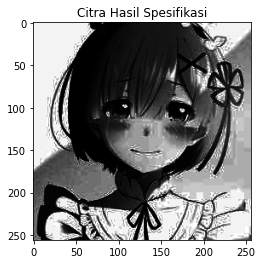

In [22]:
# Mengkonversi indeks baru yang didapat ke citra hasil spesifikasi
citraSpek = np.zeros([len(mcitra),len(mcitra[0])])
for i in range(len(intens)):
    citraSpek[citraEku==i]=indeks[i]
plt.imshow(citraSpek,"gray")
plt.title("Citra Hasil Spesifikasi")

# Pengecekkan Terhadap Hasil Spesifikasi

In [23]:
# Tahap pengecekkan, untuk matriks berfrekuensi nol tidak boleh diisi. Sehingga hasil tes harus seluruhnya bernilai 1 
oke = []
for i in range (len(hasilSpek)):
    if(matrix[i]==0 and hasilSpek[i]!=0):
        print(0) 
    else:
        print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


# Pengecekkan Terhadap Hasil Konversi Citra

In [31]:
# Jika hasil konversi benar, maka citra hasil konversi akan menghasilkan histogram yang sama dengan histogram yang sebelumnya dibuat
histoCitraEku = np.zeros(len(intens)) # dari citra hasil ekualisasi
for i in (citraEku):
    for j in (i):
        histoCitraEku[int(j)]+=1

Text(0.5, 1.0, 'Histogram dari Proses Sebelumnya')

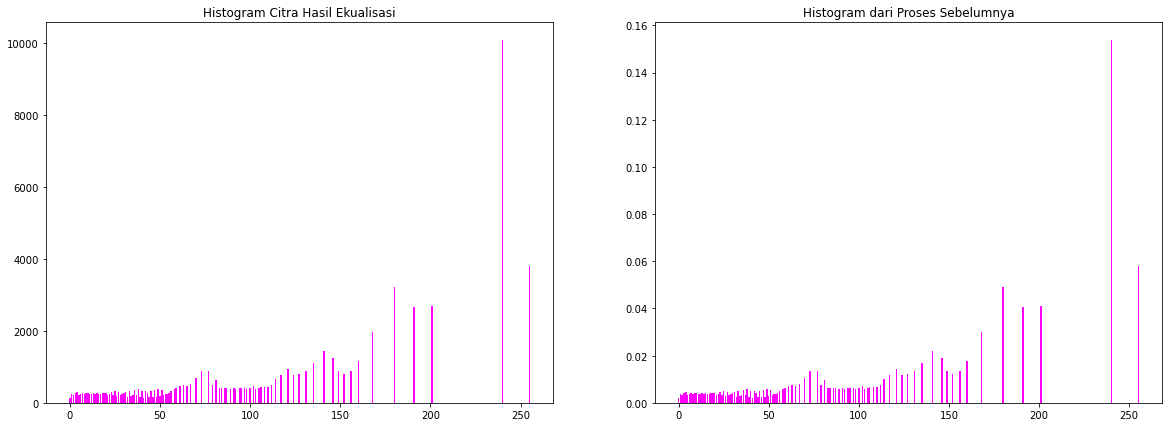

In [36]:
plt.figure(figsize=(20,7)) 
plt.subplot(1,2,1) 
plt.bar(intens, histoCitraEku, color="magenta")
plt.title("Histogram Citra Hasil Ekualisasi")
plt.subplot(1,2,2) 
plt.bar(intens, hasilEku, color="magenta")
plt.title("Histogram dari Proses Sebelumnya")

In [37]:
histoCitraSpek = np.zeros(len(intens))  # dari citra hasil spesifikasi
for i in (citraSpek):
    for j in (i):
        histoCitraSpek[int(j)]+=1

Text(0.5, 1.0, 'Histogram dari Proses Sebelumnya')

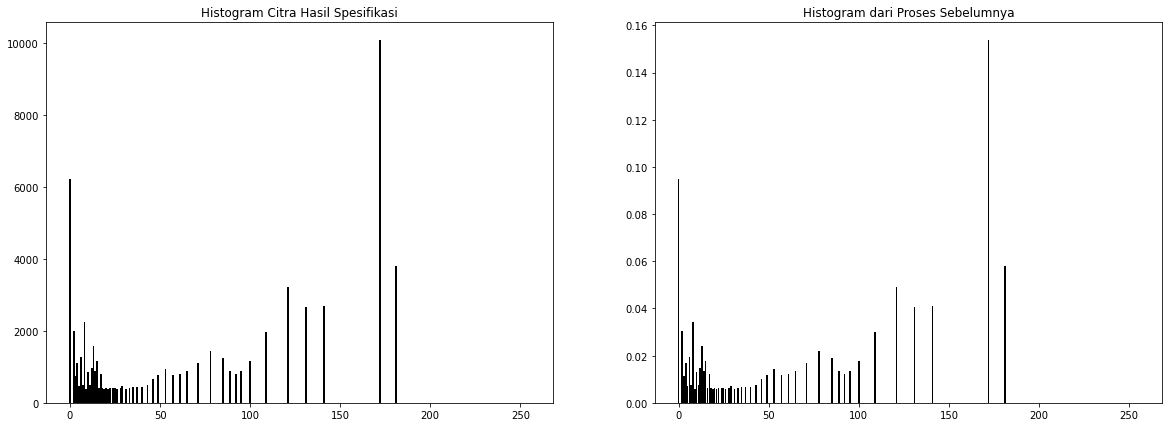

In [39]:
plt.figure(figsize=(20,7)) 
plt.subplot(1,2,1) 
plt.bar(intens, histoCitraSpek, width=1, color="black")
plt.title("Histogram Citra Hasil Spesifikasi")
plt.subplot(1,2,2) 
plt.bar(intens, hasilSpek, color="black")
plt.title("Histogram dari Proses Sebelumnya")